!pip install tensorflow opencv-python matplotlib

!pip list

In [52]:
import tensorflow as tf
import os

In [53]:
import cv2

In [54]:
data_dir = 'data'

image_exts = ['jpeg','jpg', 'bmp', 'png']

for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [57]:
import numpy as np
from matplotlib import pyplot as plt

In [58]:
data = tf.keras.utils.image_dataset_from_directory('data',batch_size=8)

Found 254 files belonging to 3 classes.


In [59]:
data_iterator = data.as_numpy_iterator()

In [60]:
batch = data_iterator.next()

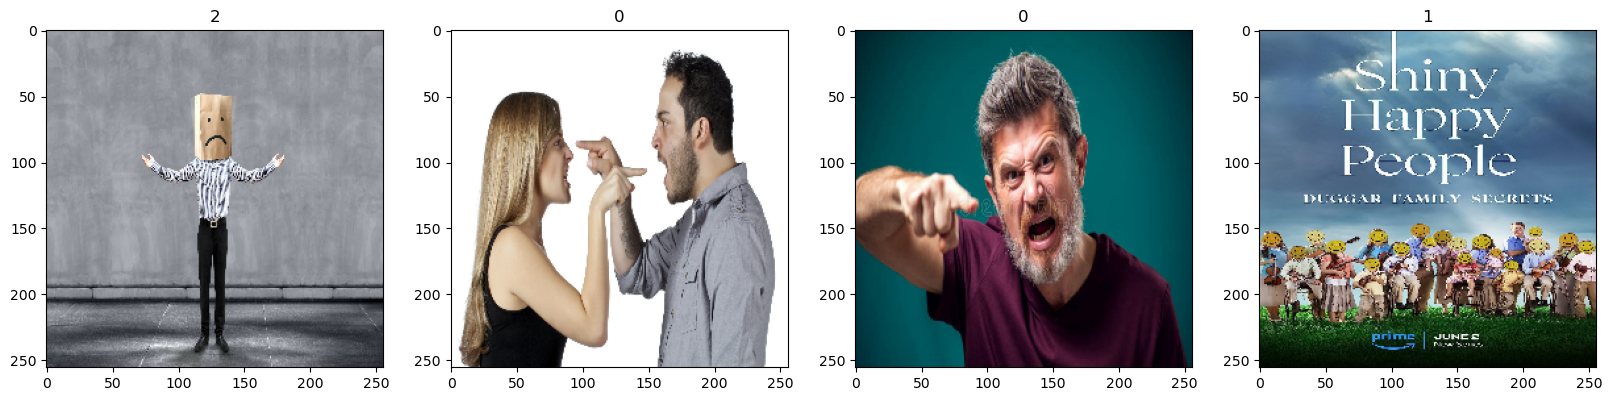

In [61]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [62]:
data = data.map(lambda x,y: (x/255, y))

In [63]:
data.as_numpy_iterator().next()

(array([[[[1.33163393e-01, 2.27281034e-01, 2.28844494e-01],
          [1.31375417e-01, 2.24573955e-01, 2.24880323e-01],
          [1.41885921e-01, 2.24238858e-01, 2.28160426e-01],
          ...,
          [1.78570196e-01, 2.72687852e-01, 2.88374126e-01],
          [1.80439547e-01, 2.74557203e-01, 2.90243477e-01],
          [1.81464463e-01, 2.75582105e-01, 2.90013224e-01]],
 
         [[1.37747973e-01, 2.27637678e-01, 2.29046986e-01],
          [1.41675279e-01, 2.24028230e-01, 2.27949798e-01],
          [1.38280287e-01, 2.20633239e-01, 2.24554807e-01],
          ...,
          [1.68374211e-01, 2.62491852e-01, 2.78178126e-01],
          [1.77083328e-01, 2.74816185e-01, 2.90502459e-01],
          [1.73846796e-01, 2.71886021e-01, 2.87572294e-01]],
 
         [[1.47395834e-01, 2.29748771e-01, 2.33670339e-01],
          [1.51707545e-01, 2.34060496e-01, 2.37982064e-01],
          [1.30657837e-01, 2.24775493e-01, 2.24775493e-01],
          ...,
          [1.74284816e-01, 2.72324026e-01, 2.8801

In [64]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [65]:
train_size

22

In [66]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [67]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [68]:
model = Sequential()

In [84]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu', input_shape=(127,127,3)))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(30,30,3)))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [86]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [88]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [90]:
logdir='logs'

In [92]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [94]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 11s 218ms/step - accuracy: 0.3757 - loss: 1.1629 - val_accuracy: 0.3333 - val_loss: 0.1774
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 128ms/step - accuracy: 0.3810 - loss: 0.3782 - val_accuracy: 0.3958 - val_loss: 0.3709
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 122ms/step - accuracy: 0.3565 - loss: 0.5067 - val_accuracy: 0.3750 - val_loss: -0.0077
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 129ms/step - accuracy: 0.3483 - loss: 0.7848 - val_accuracy: 0.4583 - val_loss: 0.1110
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 134ms/step - accuracy: 0.3672 - loss: 0.1450 - val_accuracy: 0.3750 - val_loss: -0.2499
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 126ms/step - accuracy: 0.4027 - loss: -0.1855 - val_accuracy: 0.4792 - val_loss: -0.6532
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.4097 - loss: -1.6400 - val_accuracy: 0.3958 - val_loss: -18.4484
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 126ms/step - accuracy: 0.4788 - loss: -0.7881 - val_acc

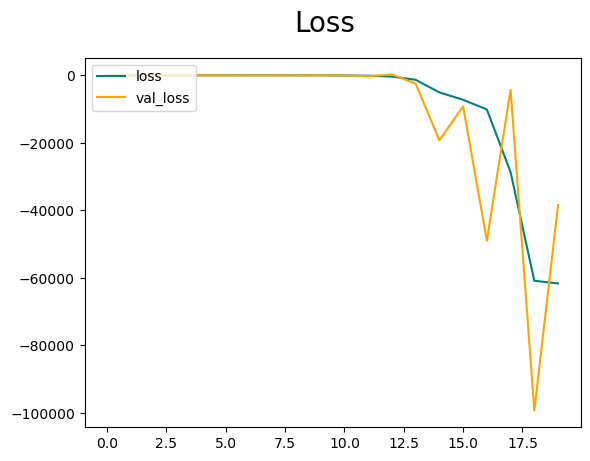

In [96]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

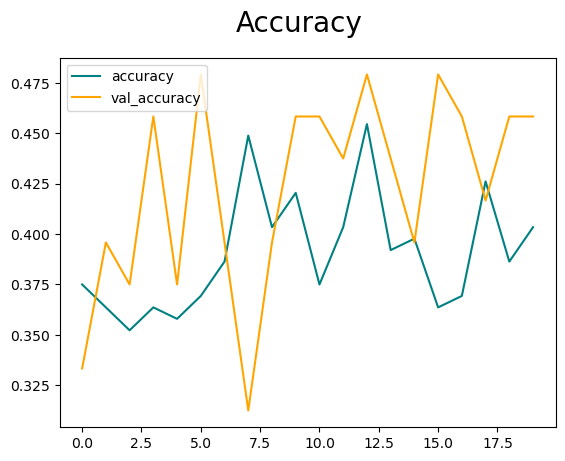

In [98]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [100]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [102]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [104]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


In [106]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.6666667, shape=(), dtype=float32) tf.Tensor(0.875, shape=(), dtype=float32) tf.Tensor(0.375, shape=(), dtype=float32)


In [108]:
import cv2

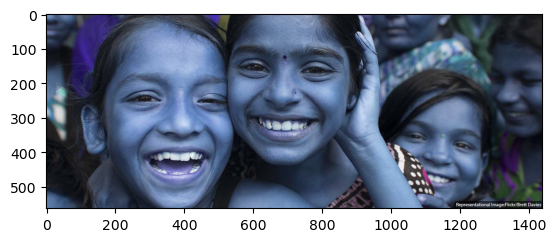

In [111]:
img = cv2.imread('happy.jpg')
plt.imshow(img)
plt.show()

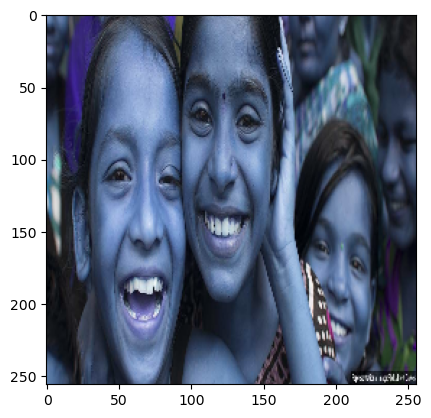

In [113]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [115]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


In [117]:
yhat

array([[1.]], dtype=float32)

In [119]:
if yhat < 0.5: 
    print(f'Predicted class is Angry')
elif yhat >= 0.5 and yhat <1.5:
    print(f'Predicted class is Happy')
else :
    print(f'Predicted class is Sad')

Predicted class is Happy


In [121]:
from tensorflow.keras.models import load_model

In [134]:
model.save(os.path.join('models','imageclassifier.h5'))

In [129]:
model.save('my_model.keras')

In [138]:
new_model = load_model('imageclassifier.h5')

In [ ]:
new_model.predict(np.expand_dims(resize/255, 0))